## Convert Audio to image

In [6]:
import librosa.display
import librosa
import soundfile as sf
from pydub import AudioSegment

import matplotlib.pyplot as plt

import pandas as pd

import numpy as np
from IPython.display import Audio

# from tensorflow import keras

import csv
import random
import os
import shutil

Create a dataset from the urban sound 8K dataset that contains all engine idling sounds as well as an equal number of random sounds taken from the other categories. Doing so using the UrbanSound8k csv with the labels and IDs of the files


In [8]:
#Giacomos paths
#csv
us_file = '/Users/giacomo/Documents/lavoro/sound8k_data/UrbanSound8K.csv'
#the keggle dataset
sound_folder = '/Users/giacomo/Documents/lavoro/sound8k_data/keggle_dataset/'

path_to_wav = '/Users/giacomo/Documents/lavoro/sound8k_data/our_dataset/'
path_to_wav_decoded = '/Users/giacomo/Documents/lavoro/sound8k_data/our_dataset_decoded/'

path_to_png = '/Users/giacomo/Documents/lavoro/sound8k_data/mel_specs/'

In [3]:
#Matthiass paths
#csv
#us_file = 'C:/Users/matthias/Documents/Projects/urban_sound_files/UrbanSound8K.csv'
#the keggle dataset


In [9]:
# create a list with all the IDs for car engine idling sounds
list_ideng_files = []
list_of_other_sounds = []

#set a variable that can be used later. Out of the 8732 files 1000 are idling engine sounds. 
# 12.9% are the amount of files (1000) that are not idling_engine sounds The variable is needed to pick files that are non idling_engine sounds
# with a random probability of 12.9 % in order to create a balanced dataset containing idling_engine and non idling_engine sounds.  
append_probability = 12.93 # 100 / 7732 * 100
random.seed(50)


with open(us_file) as csv_file:
    reader = csv.reader(csv_file)
    
    for line in reader:
        if 'engine_idling' in line:
            list_ideng_files.append(line[0])
        else: 
            # append lines with a probability of 12.9 %
            if random.randint(0,100) <= append_probability: 
                    list_of_other_sounds.append(line[0])

print('you have ', len(list_ideng_files), 'idling engine files \n' 'and ', len(list_of_other_sounds), 'non engine sounds')

you have  1000 idling engine files 
and  1015 non engine sounds


In [10]:
    
# copy all files that are found in either one of the two lists.

# create a list of all files paths from the dataset within the subfolders 

sound_files =[os.path.join(root, file) for root, directories, files in os.walk(sound_folder) for file in files]

print(sound_files)


['/Users/giacomo/Documents/lavoro/sound8k_data/keggle_dataset/UrbanSound8K.csv', '/Users/giacomo/Documents/lavoro/sound8k_data/keggle_dataset/.DS_Store', '/Users/giacomo/Documents/lavoro/sound8k_data/keggle_dataset/fold2/203929-7-5-1.wav', '/Users/giacomo/Documents/lavoro/sound8k_data/keggle_dataset/fold2/196384-9-0-2.wav', '/Users/giacomo/Documents/lavoro/sound8k_data/keggle_dataset/fold2/169098-7-4-6.wav', '/Users/giacomo/Documents/lavoro/sound8k_data/keggle_dataset/fold2/123688-8-0-4.wav', '/Users/giacomo/Documents/lavoro/sound8k_data/keggle_dataset/fold2/174994-3-0-0.wav', '/Users/giacomo/Documents/lavoro/sound8k_data/keggle_dataset/fold2/18453-3-0-0.wav', '/Users/giacomo/Documents/lavoro/sound8k_data/keggle_dataset/fold2/109703-2-0-134.wav', '/Users/giacomo/Documents/lavoro/sound8k_data/keggle_dataset/fold2/147926-0-0-44.wav', '/Users/giacomo/Documents/lavoro/sound8k_data/keggle_dataset/fold2/123688-8-0-13.wav', '/Users/giacomo/Documents/lavoro/sound8k_data/keggle_dataset/fold2/20

In [14]:

# Now copy all files present in the two lists into a new folder (destination folder var)
for path in sound_files:
    filename = os.path.basename(path)
    if filename in (list_ideng_files + list_of_other_sounds):
        destination = os.path.join(path_to_wav, filename)
        shutil.copy2(path, path_to_wav)

## Standardize imput 


Some files are recorded with one, some with two channels. Lets convert all files to two channels.
Also, some have a sampling rate of 48.000 Hz, some of 44.100 Hz. Here we need to make all imput arrays the same size.
Last we make all files the same length by adding silence to shorter files

In [7]:
import os
import subprocess

# Directory containing the files to convert
input_dir = path_to_wav

# Directory to save the converted files
output_dir = path_to_wav_decoded

# Ensure output directory exists
os.makedirs(output_dir, exist_ok=True)

# Loop over all files in the input directory
for filename in os.listdir(input_dir):
    # Skip non-WAV files
    if not filename.endswith('.wav'):
        continue

    # Full path to the original file
    input_file = os.path.join(input_dir, filename)

    # Full path to the converted file
    output_file = os.path.join(output_dir, filename)

    # Convert the file with ffmpeg
    subprocess.run(['ffmpeg','-y', '-i', input_file, '-c:a', 'pcm_s16le', output_file])

ffmpeg version 6.0 Copyright (c) 2000-2023 the FFmpeg developers
  built with Apple clang version 14.0.0 (clang-1400.0.29.202)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/6.0_1 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags= --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libspeex --enable-libsoxr --enable-libzmq --enable-libzimg --dis

In [8]:
# get full path of the audio files
full_file_paths = [os.path.join(path_to_wav_decoded, filename) 
                   for filename in os.listdir(path_to_wav) 
                   if os.path.isfile(os.path.join(path_to_wav, filename)) and filename.endswith('.wav')] 


def standardize_audio(audio, target_length):
    # apply sampling rate of 44100 and mono to all files
    _ = librosa.load(audio, sr=44100, mono = True) 
    
    # Add silence to shorter files
    current_audio = AudioSegment.from_wav(audio)
    current_length = len(current_audio)
    
    if current_length < target_length: 
        # get difference in duration and calculate the sound of silence
        silence_duration = target_length - current_length
        # create a sound of silence with the needed length   
        silence = AudioSegment.silent(duration=silence_duration)
        #add the sound of silence at the end of the file
        padded_audio = current_audio + silence
        return padded_audio
    else:
        padded_audio = current_audio
    
    padded_audio.export(audio, format="wav")
        
# find max duration in ms within all audio files      
from pydub import AudioSegment

# List of audio file extensions
audio_extensions = ['wav']

# Get length of audio files, skipping non-audio files
target_length = max([len(AudioSegment.from_file(file)) for file in full_file_paths])

# loop trough all files and apply the standardization
# To save some space on the disc we overwrite the files instead of creating new ones!
for file in full_file_paths:
    standardize_audio(file, target_length) 


## Create mel spectrograms

First we check one of the samples just to make sure everything is right. We take a look at a waveplot as well as a mel spectrogram.
After that we will create mel spectrograms for each audio file.

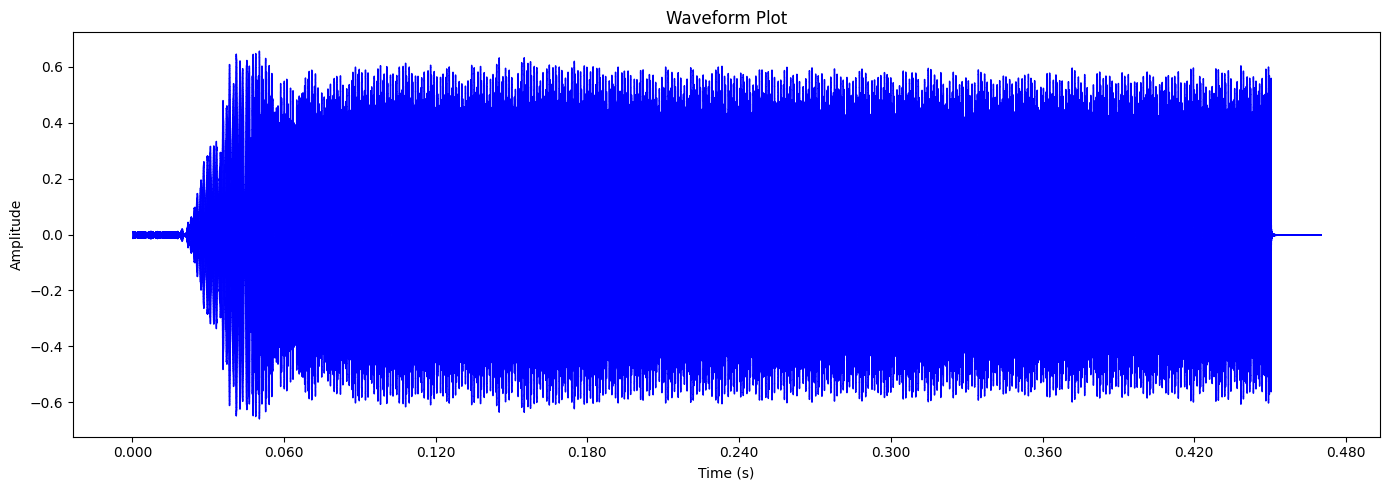

In [9]:
# select an audio file as an example
audio_file =  path_to_wav_decoded  + '2937-1-0-0.wav'

#If samples are not already, convert to np.array, can probably be simpflified, no need for if check

y, sr = librosa.load(audio_file, sr=44100, mono = True)
if not isinstance(y, np.ndarray):
    samples = np.array(y)


plt.figure(figsize=(14, 5))
librosa.display.waveshow(y, sr=sr, color='b') #color specification needed due to version incompatibility problems btw librosa and matplotlib
plt.title('Waveform Plot')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.tight_layout()
plt.show()

In [10]:
# Listen to the audio 
Audio(audio_file)


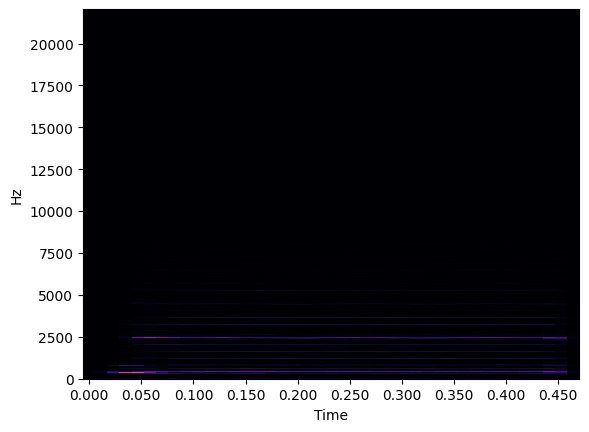

In [11]:
#Apply fourier transformation and plot 

sgram = librosa.stft(y)
librosa.display.specshow(np.abs(sgram), sr=sr, x_axis='time', y_axis='linear')

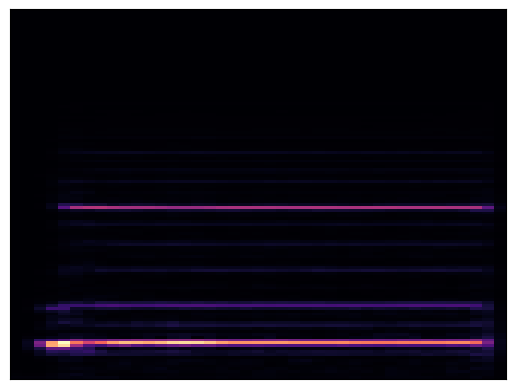

In [12]:
# Create a mel spectrogramm 
sgram_mag, _ = librosa.magphase(sgram)
mel_scale_sgram = librosa.feature.melspectrogram(S=sgram_mag, sr=sr)
librosa.display.specshow(mel_scale_sgram)


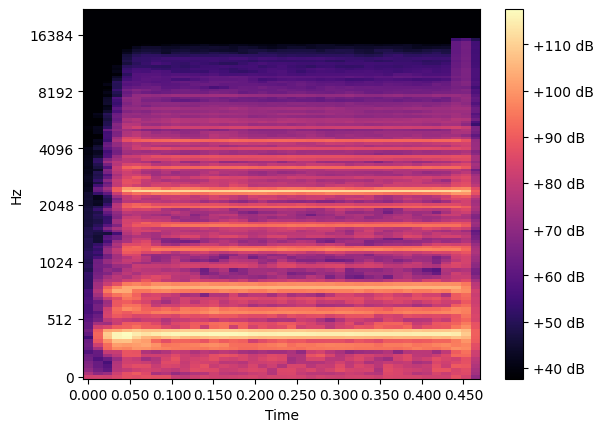

In [13]:

mel_sgram = librosa.amplitude_to_db(mel_scale_sgram, ref=np.min)
librosa.display.specshow(mel_sgram, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')

In [18]:
def create_mel_specs (path_to_wav, path_to_png):

    #create a list of all wav files needed to be converted: 
    
    file_list = [file for file in os.listdir(path_to_wav) if file.endswith('.wav')]
    #print(file_list)
    
    for file in file_list:    
        print(file)
        #create correct file name for saving
        audio_file = os.path.join(path_to_wav, file)
        output_file = os.path.join(path_to_png, os.path.splitext(file)[0] + '.png')
        
        # load the files and transfrom into np array
        samples, sample_rate = librosa.load(audio_file, sr=44100)
        if not isinstance(samples, np.ndarray):
            samples = np.array(samples)
        
        #apply a stft transformation    
        stft = librosa.stft(samples)

        #modify it in order to use the mel-scale instead of frenquency
        mel_scale_spec, par = librosa.magphase(stft)
        mel_spec = librosa.feature.melspectrogram(S=mel_scale_spec, sr=sample_rate)

        # Go from amplitude to db 
        mel_spec_db = librosa.amplitude_to_db(mel_spec, ref=np.min)

        # create and save the figure
        plt.figure()        
        librosa.display.specshow(mel_spec_db, x_axis='time', y_axis='mel', sr=sample_rate)
        plt.axis('off')

        #save plot without any white border
        plt.savefig(output_file, bbox_inches='tight', pad_inches=0, transparent=True)
        plt.close()
                

In [19]:
#Test section for the function

# here one might need to activate in order to save the images
## matplotlib.use('Agg')
# This can become a problem later on when trying to show plots in the notebook. Fixed it by restarting the kernel

test = create_mel_specs(path_to_wav_decoded, path_to_png)

203929-7-5-1.wav
7965-3-16-0.wav
44737-5-0-2.wav
209992-5-2-81.wav
94632-5-0-0.wav
155217-9-1-24.wav
17853-5-0-11.wav
201988-5-0-8.wav
195451-5-0-4.wav
80806-2-0-3.wav
201988-5-0-21.wav
128160-5-0-15.wav
209992-5-2-42.wav
188823-7-2-0.wav
174276-7-5-0.wav
34771-3-0-5.wav
39856-5-0-28.wav
58857-2-0-14.wav
195451-5-0-11.wav
39856-5-0-14.wav
61503-2-0-5.wav
197554-2-0-82.wav
162134-7-12-2.wav
113202-5-0-0.wav
176787-5-0-9.wav
98202-9-0-10.wav
55020-4-0-11.wav
113203-5-3-1.wav
156358-5-0-2.wav
81068-5-0-1.wav
103074-7-2-0.wav
185373-9-1-70.wav
113205-5-1-4.wav
159747-8-0-17.wav
149255-9-0-7.wav
34050-7-0-0.wav
165529-2-0-90.wav
177756-2-0-16.wav
201652-5-4-9.wav
136558-9-1-10.wav
54914-2-0-27.wav
159439-2-0-21.wav
113216-5-0-0.wav
107228-5-0-3.wav
106015-5-0-0.wav
206037-2-0-3.wav
16692-5-0-7.wav
62566-5-1-1.wav
169045-2-0-14.wav
135160-8-0-0.wav
17853-5-0-3.wav
39884-5-0-0.wav
171249-1-1-0.wav
144007-5-0-9.wav
165166-8-0-8.wav
157207-6-7-0.wav
113202-5-0-16.wav
39532-4-3-0.wav
78651-5-0-5

## Create NNs

## import metadata 

import the UrbanSound8k csv, filter out all entries that are not used in this project and take a look at the data.


In [15]:
df = pd.read_csv(us_file, header=0)
print(df.head(5))

      slice_file_name    fsID  start        end  salience  fold  classID  \
0    100032-3-0-0.wav  100032    0.0   0.317551         1     5        3   
1  100263-2-0-117.wav  100263   58.5  62.500000         1     5        2   
2  100263-2-0-121.wav  100263   60.5  64.500000         1     5        2   
3  100263-2-0-126.wav  100263   63.0  67.000000         1     5        2   
4  100263-2-0-137.wav  100263   68.5  72.500000         1     5        2   

              class  
0          dog_bark  
1  children_playing  
2  children_playing  
3  children_playing  
4  children_playing  


In [16]:
# get rid of all unused files

filtered_df = df[df['slice_file_name'].isin(list_ideng_files + list_of_other_sounds)]
    
print(filtered_df.head(10))

      slice_file_name    fsID  start   end  salience  fold  classID  \
8   100263-2-0-36.wav  100263   18.0  22.0         1     5        2   
14   100652-3-0-0.wav  100652    0.0   4.0         1     2        3   
17   100652-3-0-3.wav  100652    1.5   5.5         1     2        3   
22   100852-0-0-0.wav  100852    0.0   4.0         1     5        0   
28  100852-0-0-14.wav  100852    7.0  11.0         1     5        0   
29  100852-0-0-15.wav  100852    7.5  11.5         1     5        0   
36  100852-0-0-21.wav  100852   10.5  14.5         1     5        0   
74  101729-0-0-18.wav  101729    9.0  13.0         2     9        0   
79  101729-0-0-24.wav  101729   12.0  16.0         2     9        0   
81  101729-0-0-28.wav  101729   14.0  18.0         2     9        0   

               class  
8   children_playing  
14          dog_bark  
17          dog_bark  
22   air_conditioner  
28   air_conditioner  
29   air_conditioner  
36   air_conditioner  
74   air_conditioner  
79   air_co

In [17]:
# As we are only interested in idling engine sounds and use the other files as a non engine control to train our network, 
# we now change the label of everything that is non idling engine sound to that.

filtered_df.loc[filtered_df['class'] != 'engine_idling', 'class'] = 'non_idling_engine'
print(filtered_df.head(100))

       slice_file_name    fsID  start   end  salience  fold  classID  \
8    100263-2-0-36.wav  100263   18.0  22.0         1     5        2   
14    100652-3-0-0.wav  100652    0.0   4.0         1     2        3   
17    100652-3-0-3.wav  100652    1.5   5.5         1     2        3   
22    100852-0-0-0.wav  100852    0.0   4.0         1     5        0   
28   100852-0-0-14.wav  100852    7.0  11.0         1     5        0   
..                 ...     ...    ...   ...       ...   ...      ...   
250   103258-5-0-3.wav  103258    1.5   5.5         1     1        5   
251   103258-5-0-4.wav  103258    2.0   6.0         1     1        5   
252   103258-5-0-5.wav  103258    2.5   6.5         1     1        5   
253   103258-5-0-6.wav  103258    3.0   7.0         1     1        5   
254   103258-5-0-7.wav  103258    3.5   7.5         1     1        5   

                 class  
8    non_idling_engine  
14   non_idling_engine  
17   non_idling_engine  
22   non_idling_engine  
28   non_i

In [18]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

# Preprocess and batch the dataset (add any necessary preprocessing here)
data_df = filtered_df[['slice_file_name', 'class']]
data_df.loc[:,'slice_file_name'] = data_df['slice_file_name'].str.replace('.wav', '.png')
dataset_path = '/Users/giacomo/Documents/lavoro/sound8k_data/mel_specs/' #where the mel specs are


# Split the data into train+validation and test sets
train_val_df, test_df = train_test_split(data_df, test_size=0.2, random_state=42)

# Further split the train+validation set into separate train and validation sets
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

# Create an ImageDataGenerator for data loading and preprocessing
datagen = keras.preprocessing.image.ImageDataGenerator(
    rescale=1.0/255,  # Normalize pixel values to the range [0, 1]
)

# Use flow_from_dataframe to load and preprocess the images
batch_size = 64  # Adjust this according to your needs

# Train generator
train_generator = datagen.flow_from_dataframe(
    train_df,
    directory=dataset_path,
    x_col="slice_file_name",  # Column containing filenames
    y_col="class",  # Column containing class labels
    target_size=(224, 224),  # Reshape your images to a desired size
    batch_size=batch_size,
    class_mode='categorical',  # If you have multiple classes
    validate_filenames=True  # For the training set
)

# Validation generator
validation_generator = datagen.flow_from_dataframe(
    val_df,
    directory=dataset_path,
    x_col="slice_file_name",
    y_col="class",
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    validate_filenames=True # For the validation set
)

# Test generator
test_generator = datagen.flow_from_dataframe(
    test_df,
    directory=dataset_path,
    x_col="slice_file_name",
    y_col="class",
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    validate_filenames=True # For the test set
)

num_classes = len(train_generator.class_indices)  # Get the number of classes

Found 1209 validated image filenames belonging to 2 classes.
Found 403 validated image filenames belonging to 2 classes.
Found 403 validated image filenames belonging to 2 classes.


In [9]:
#test different models architectire and hyperparameters values
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from kerastuner.tuners import RandomSearch

# rest of your code

def build_model(hp):
    model = Sequential()
    model.add(Conv2D(hp.Int('conv_1_units', min_value=32, max_value=256, step=32), (3, 3), activation='leaky_relu', input_shape=(224, 224, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(hp.Float('dropout_1', min_value=0.0, max_value=0.5, step=0.1)))

    for i in range(hp.Int('num_layers', 1, 3)):
        model.add(Conv2D(hp.Int(f'conv_{i+2}_units', min_value=32, max_value=256, step=32), (3, 3), activation='leaky_relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(hp.Float(f'dropout_{i+2}', min_value=0.0, max_value=0.5, step=0.1)))

    model.add(Flatten())
    model.add(Dense(hp.Int('dense_units', min_value=32, max_value=256, step=32), activation='leaky_relu'))
    model.add(Dense(2, activation='softmax'))

    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
    return model

tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
    directory='my_dir',
    project_name='engine_idling')

tuner.search_space_summary()

tuner.search(train_generator, 
             epochs=5, 
             validation_data=validation_generator)

tuner.results_summary()

Trial 5 Complete [00h 40m 16s]
val_accuracy: 0.7460711399714152

Best val_accuracy So Far: 0.8122415343920389
Total elapsed time: 03h 55m 04s
Results summary
Results in my_dir/engine_idling
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 2 summary
Hyperparameters:
conv_1_units: 96
dropout_1: 0.0
num_layers: 1
conv_2_units: 96
dropout_2: 0.1
dense_units: 256
conv_3_units: 128
dropout_3: 0.2
conv_4_units: 64
dropout_4: 0.30000000000000004
Score: 0.8122415343920389

Trial 4 summary
Hyperparameters:
conv_1_units: 128
dropout_1: 0.30000000000000004
num_layers: 2
conv_2_units: 128
dropout_2: 0.2
dense_units: 160
conv_3_units: 160
dropout_3: 0.30000000000000004
conv_4_units: 128
dropout_4: 0.0
Score: 0.7460711399714152

Trial 3 summary
Hyperparameters:
conv_1_units: 192
dropout_1: 0.2
num_layers: 1
conv_2_units: 96
dropout_2: 0.30000000000000004
dense_units: 256
conv_3_units: 192
dropout_3: 0.0
conv_4_units: 32
dropout_4: 0.30000000000000004
Score: 0.737799843152

In [19]:
#second model CNN 1 to 4 + max pooling
def build_model(hp):
    model = Sequential()
    model.add(Conv2D(hp.Int('conv_1_units', min_value=32, max_value=256, step=32), (3, 3), activation='leaky_relu', input_shape=(224, 224, 3)))
    model.add(Dropout(hp.Float('dropout_1', min_value=0.0, max_value=0.5, step=0.1)))

    for i in range(hp.Int('num_layers', 1, 4)):
        model.add(Conv2D(hp.Int(f'conv_{i+2}_units', min_value=32, max_value=256, step=32), (3, 3), activation='leaky_relu'))
        model.add(Dropout(hp.Float(f'dropout_{i+2}', min_value=0.0, max_value=0.5, step=0.1)))

    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(hp.Int('dense_units', min_value=32, max_value=256, step=32), activation='leaky_relu'))
    model.add(Dense(2, activation='softmax'))

    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
    return model

tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
    directory='my_dir',
    project_name='engine_idling1')

tuner.search_space_summary()

tuner.search(train_generator, 
             epochs=5, 
             validation_data=validation_generator)

tuner.results_summary()

Search space summary
Default search space size: 5
conv_1_units (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': 'linear'}
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 4, 'step': 1, 'sampling': 'linear'}
conv_2_units (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': 'linear'}
dropout_1 (Float)
{'default': 0.0, 'conditions': [], 'min_value': 0.0, 'max_value': 0.5, 'step': 0.1, 'sampling': 'linear'}
dense_units (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': 'linear'}

Search: Running Trial #1

Value             |Best Value So Far |Hyperparameter
192               |192               |conv_1_units
3                 |3                 |num_layers
192               |192               |conv_2_units
0.2               |0.2               |dropout_1
160               |160               |dense_units

Epoch 1

: 

In [ ]:
# launch tensorboard
%load_ext tensorboard
%tensorboard --logdir logs/fit
